# Titanic 3: Creating a Pipeline and tuning the model with Grid Search Cross Validation

# 1.&nbsp; Data reading and preprocessing

We will first review what we did in the previous notebook.

In [1]:
import pandas as pd

In [2]:
url = "https://drive.google.com/file/d/1g3uhw_y3tboRm2eYDPfUzXXsw8IOYDCy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

data = pd.read_csv(path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1.1. Set X and y

- **X**: columns that help us make a prediction.
- **y**: the column that we want to predict.

In [3]:
X = data.drop(columns=["PassengerId", "Name", "Ticket"])
y = X.pop("Survived")

## 1.2. Feature selection

Since scikit-Learn models cannot deal with categorical features, we will keep only the numerical features.

In [4]:
X_num = X.select_dtypes(include="number")

## 1.3. Split the data

In [5]:
from sklearn.model_selection import train_test_split

In [7]:
X_num_train, X_num_test, y_train, y_test = train_test_split(X_num,
                                                            y,
                                                            test_size=0.2,
                                                            random_state=42)

## 1.4. Impute missing values

(Fit on train, transform train & test)

In [8]:
from sklearn.impute import SimpleImputer

my_imputer = SimpleImputer().set_output(transform='pandas') # initialize
my_imputer.fit(X_num_train) # fit on the train set
X_num_imputed_train = my_imputer.transform(X_num_train) # transform the train set
X_num_imputed_test = my_imputer.transform(X_num_test) # transform the test set

## 1.5. Modelling: Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [9]:
from sklearn.tree import DecisionTreeClassifier

Initialize the model.

In [16]:
my_tree = DecisionTreeClassifier(max_depth=4,
                                 min_samples_leaf=10
                                )

Fit the model to the train data.

In [17]:
my_tree.fit(X = X_num_imputed_train,
            y = y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

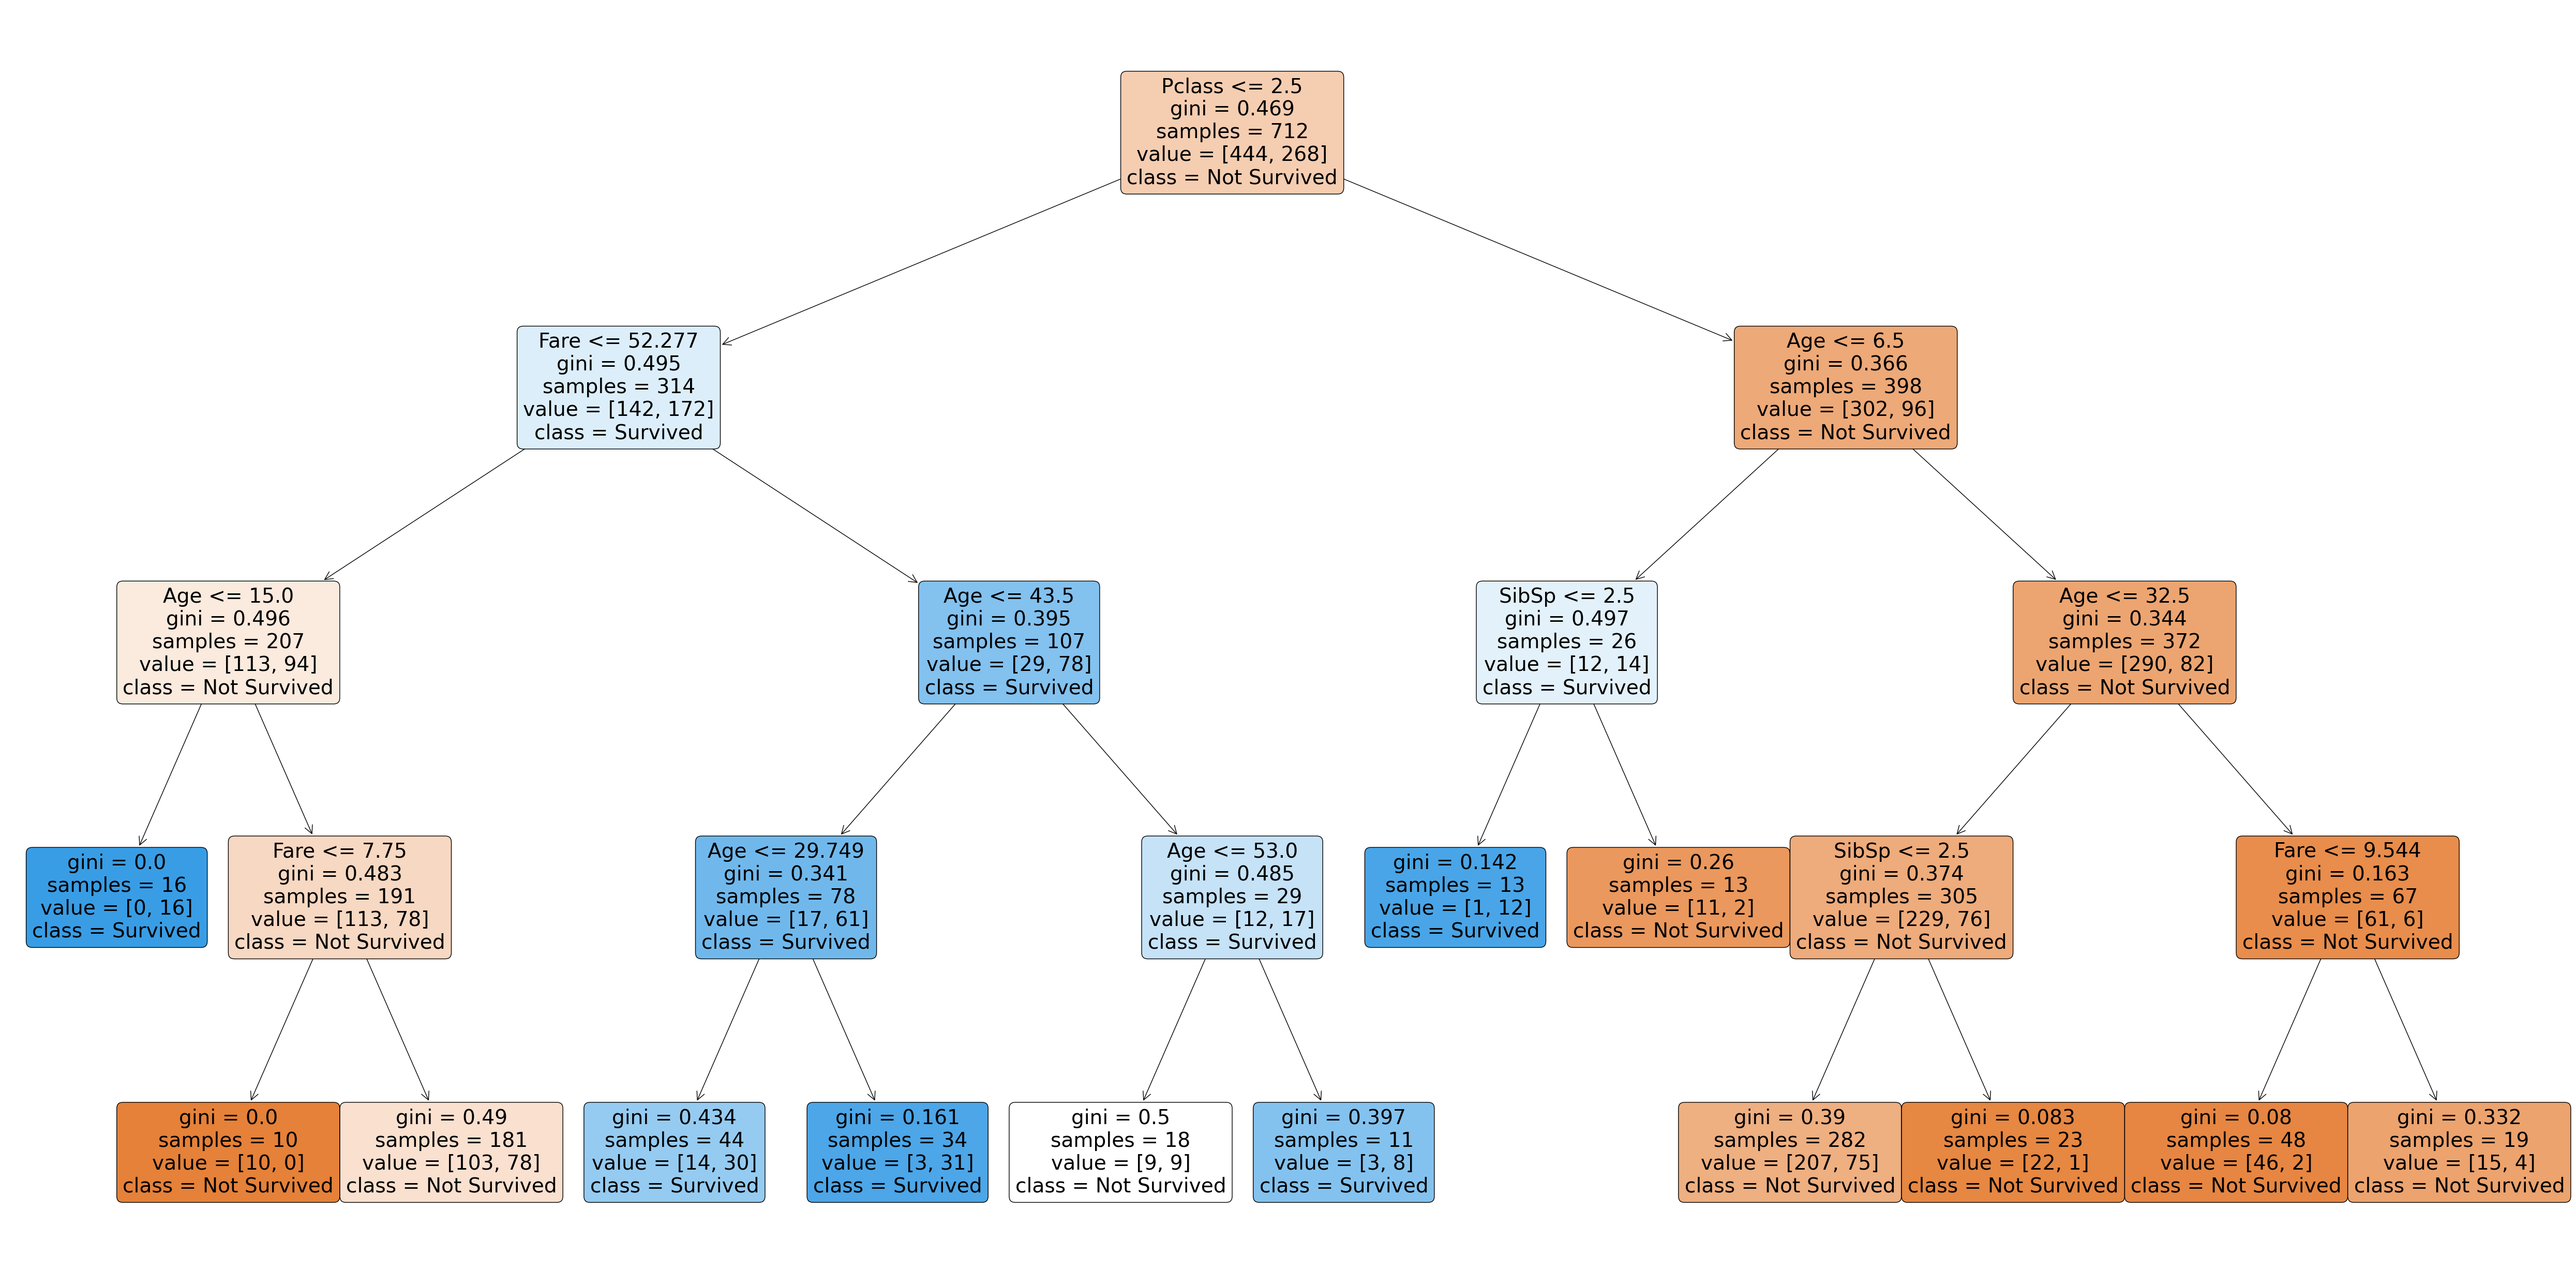

In [18]:
# plotting the tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(64, 32))

plot_tree(
     my_tree,
     filled=True,
     rounded=True,
     class_names=['Not Survived','Survived'],
     feature_names=X_num.columns.to_list()
     );

## 1.6. Check accuracy on the train set

In [19]:
from sklearn.metrics import accuracy_score

Use the model and the preprocessed **train** data to make predictions.

In [20]:
y_pred_tree_train = my_tree.predict(X_num_imputed_train)

In [21]:
y_pred_tree_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,

Take the predicted values and the data from y train, and compare them with each other. The greater the share of correct predictions is, the closer the accuracy score will be to 1.

In [22]:
accuracy_score(y_true = y_train,
               y_pred = y_pred_tree_train)

0.7303370786516854

## 1.7. Check accuracy on the test set

To check whether our model is only good at predicting the values it was trained on (overfitting) or also useful to predict new data:

use the model and the preprocessed **test** data to make predictions.

In [23]:
y_pred_tree_test = my_tree.predict(X_num_imputed_test)

Then, take the predicted values and the data from y test, and compare them with each other.

Ideally, the accuracy for the train and the test data is similar.

In [24]:
accuracy_score(y_true = y_test,
               y_pred = y_pred_tree_test)

0.6759776536312849

# 2.&nbsp; Pipeline creation

Before moving forward in our quest to improve the model, take a moment to learn how to use Scikit-Learn Pipelines. They will not increase the performance of your model. However, they are a necessary tool to compress all the steps in the data preparation & modelling phases into a single one. This will become very relevant as we move forward and keep adding more steps:

* Read the lesson "Scikit-Learn Pipelines" on the platform.

* Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

## 2.1 Initialize transformer and model

In [45]:
#changed parameters max_depth= 5, min_samples_leaf=12
imputer = SimpleImputer(strategy="mean")
dtree = DecisionTreeClassifier(max_depth=5,
                               min_samples_leaf=12,
                               random_state=42)

## 2.2 Create a pipeline

In [46]:
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

Note that make_pipeline is just a slightly more concise function than Pipeline, as it does not require you to name each step, but their behaviour is equivalent.

In [29]:
from sklearn.pipeline import Pipeline
pipe_2 = Pipeline([("imputer", imputer), ("classifier", dtree)]).set_output(transform='pandas')

## 2.3 Fit the pipeline to the training data

In [47]:
pipe.fit(X_num_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=12,
                                        random_state=42))])

In [48]:
# Assuming imputer is the first step in your pipeline
imputer = pipe.named_steps['simpleimputer']  # Replace 'simpleimputer' with the actual name of your imputer step
print(imputer.statistics_)
print(imputer.strategy)


[ 2.33005618 29.49884615  0.55337079  0.37921348 32.58627612]
mean


In [49]:
print(X_num_train.isnull().sum())


Pclass      0
Age       140
SibSp       0
Parch       0
Fare        0
dtype: int64


If you want pipe steps presented like text:

In [31]:
from sklearn import set_config

set_config(display="text")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=12,
                                        random_state=42))])

To switch back to diagram:

In [32]:
set_config(display="diagram")
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=12,
                                        random_state=42))])

## 2.4 Use the pipeline to make predictions

In [35]:
pipe.predict(X_num_test)

Now, the object `pipe` can take (almost) raw data as input and output predictions. We no longer need to impute missing values and use the model to make predictions in separate steps.

# 3.&nbsp; Use GridSearchCV to find the best parameters of the model

So far, we tuned the hyperparameters of the decision tree manually. This is not ideal, for two reasons:

- It's not efficient in terms of quickly finding the best combination of parameters.
- If we keep checking the performance on the test set over and over again, we might end up creating a model that fits that particular test set, but does not generalize as well with new data. Test sets are meant to reamain unseen until the very last moment of ML development —we have been cheating a bit!

Grid Search Cross Validation solves both issues:

* Read the lesson "Housing Prices: Iteration 2, Grid Search & Cross Validation" on the platform.

* Check the docs: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [51]:
# 1. initialize transformers & model without specifying the parameters
imputer = SimpleImputer()
dtree = DecisionTreeClassifier()

In [52]:
# 2. Create a pipeline
pipe = make_pipeline(imputer, dtree).set_output(transform='pandas')

In [55]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

To define the parameter grid for cross validation, you need to create a dictionary, where:

- The keys are the name of the pipeline step, followed by two underscores and the name of the parameter you want to tune.
- The values are lists (or "ranges") with all the values you want to try for each parameter.

In [56]:
for value in range(2, 12, 2):
    print(value)

2
4
6
8
10


In [57]:
param_grid = {
    'decisiontreeclassifier__max_depth': range(2, 12),
    'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
    'decisiontreeclassifier__min_samples_split': range(3, 40, 5),
    'decisiontreeclassifier__criterion':['gini', 'entropy']
    }

When defining the cross validation, we want to pass our pipeline (`pipe`), our parameter grid (`param_grid`) and the number of folds (an arbitrary number, usually 5 or 10). You can also define the parameter `verbose` if you want to recieve a bit more info about the CV task.

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
search = GridSearchCV(pipe, # you have defined this beforehand
                      param_grid, # your parameter grid
                      cv=5, # the value for K in K-fold Cross Validation
                      scoring='accuracy', # the performance metric to use,
                      verbose=1) # we want informative outputs during the training process

Fit your "search" to the training data (`X` and `y`), as we used to do with our model alone or with our pipeline:

In [60]:
search.fit(X_num_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 12),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10, 2),
                         'decisiontreeclassifier__min_samples_split': range(3, 40, 5)},
             scoring='accuracy', verbose=1)

Explore the best parameters and the best score achieved with your cross validation:

In [61]:
search.best_params_

{'decisiontreeclassifier__criterion': 'gini',
 'decisiontreeclassifier__max_depth': 4,
 'decisiontreeclassifier__min_samples_leaf': 7,
 'decisiontreeclassifier__min_samples_split': 8}

In [62]:
# the mean cross-validated score of the best estimator
search.best_score_

0.7274697133852064

In [63]:
# training accuracy
y_train_pred = search.predict(X_num_train)

accuracy_score(y_train, y_train_pred)

0.7303370786516854

In [64]:
# testing accuracy
y_test_pred = search.predict(X_num_test)

accuracy_score(y_test, y_test_pred)

0.6759776536312849

# 4.&nbsp; Use GridSearchCV to find the best parameters of the pipeline

Add a scaler to the pipeline, and use GridSearchCV to tune the parameters of the scaler, as well as the parameters of the imputer and the decision tree.

This shows how Grid Search Cross Validation can be used to not only tune the parameters of the model but also the parameters of all the transformers in a pipeline, thus helping us find the best preprocessing strategy for our data.

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
# initialize transformers & model
imputer = SimpleImputer()
scaler = StandardScaler()
dtree = DecisionTreeClassifier()

In [67]:
# create the pipeline
pipe = make_pipeline(imputer,
                     scaler,
                     dtree).set_output(transform='pandas')

We can see the steps in the pipeline (note that they have been given names: `simpleimputer` and `decisiontreeclassifier`. we will use these names when defining the parameter grid for the cross validation)

In [68]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [69]:
# create parameter grid
param_grid = {
    "simpleimputer__strategy":["mean", "median"],
    "standardscaler__with_mean":[True, False],
    "standardscaler__with_std":[True, False],
    "decisiontreeclassifier__max_depth": range(2, 14),
    "decisiontreeclassifier__min_samples_leaf": range(3, 10),
    "decisiontreeclassifier__criterion":["gini", "entropy"]
}

In [70]:
# define cross validation
search = GridSearchCV(pipe,
                      param_grid,
                      cv=10,
                      verbose=1)

In [71]:
# fit
search.fit(X_num_train, y_train)

Fitting 10 folds for each of 1344 candidates, totalling 13440 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__criterion': ['gini',
                                                               'entropy'],
                         'decisiontreeclassifier__max_depth': range(2, 14),
                         'decisiontreeclassifier__min_samples_leaf': range(3, 10),
                         'simpleimputer__strategy': ['mean', 'median'],
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             verbose=1)

In [72]:
# cross validation average accuracy
search.best_score_

0.7204616588419406

In [73]:
# best parameters
search.best_params_

{'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 6,
 'decisiontreeclassifier__min_samples_leaf': 5,
 'simpleimputer__strategy': 'mean',
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True}

## **Your challenge**

In a new notebook, apply everything you have learned here to the Housing project, following the Learning platform when needed.